### SparklyRGT Template: choiceRGT

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder (current working directory) 

**Getting started: Please make a copy of this (sparklyRGT_template_4) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation (ex. template_4 uses section 1 and 4) 
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
# import sparklyRGT as rgt 
import sparklyRGT as rgt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


In [2]:
%load_ext autoreload
%autoreload 2 #deletable cell 

***

# 1) Load data into Python



In [3]:
file_names = ['Free S33-37 Raw.xlsx'] 
df = rgt.load_data(file_names)
df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H4,Rew_Persev_H5,Lever_Latency,Uncued_Chosen,Cued_Chosen,Choice_Omit
0,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,1.0,...,0,0,0,0,0,0,6.97,1,0,0
1,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,2.0,...,0,0,0,0,0,0,2.78,0,1,0
2,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,3.0,...,0,0,0,0,0,0,2.29,0,1,0
3,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.1,...,1,5,0,0,0,0,5.48,0,1,0
4,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.0,...,0,0,0,0,0,0,1.30,0,1,0


# 4) Choice rGT

Set your variables!

In [4]:
#for plotting: 
title = 'Choice rGT' 

startsess = 33 #first session you would like to include in figures
endsess = 37 #last session you would like to include in figures

In [5]:
#This cell is optional if you want to split by group

males = [1,2,3,4,5] #rats 1 to 5

females = [6,7,8,9,10] #rats 6 to 10

group_names = {0: 'males',
              1: 'females'} 

group_list = [males,females]

## Data cleaning

In [6]:
rgt.check_sessions(df)

Subject  StartDate  Session
1        05/23/21   33          80.0
         05/24/21   34          83.0
         05/25/21   35          85.0
         05/26/21   36          78.0
         05/27/21   37          75.0
2        05/23/21   33         104.0
         05/24/21   34         103.0
         05/25/21   35          87.0
         05/26/21   36          66.0
         05/27/21   37          92.0
3        05/23/21   33         107.0
         05/24/21   34          97.0
         05/25/21   35          98.0
         05/26/21   36         104.1
         05/27/21   37         108.0
4        05/23/21   33         101.0
         05/24/21   34          93.0
         05/25/21   35          94.0
         05/26/21   36          93.1
         05/27/21   37          91.0
5        05/23/21   33          83.0
         05/24/21   34          59.0
         05/25/21   35          52.1
         05/26/21   36          67.1
         05/27/21   37          66.0
6        05/23/21   33          78.0
         0

In [7]:
# df2 = rgt.drop_sessions(df, [28])
# df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all") 

## Data processing

### Calculate variables for each rat


In [8]:
df_sum = rgt.get_summary_data(df, task = 'choiceRGT') #use df instead of df2 if you didn't do any session editing, v.v.
df_sum 

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,...,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,...,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,...,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,...,28.125000,11.111111,15.789474,7.575758,12.121212,71.093750,68.750000,70.370370,81.000000,66.666667
5,25,75,0,0,39.5349,60.4651,0,0,25,75,...,0.000000,11.111111,5.000000,0.000000,12.765957,15.789474,23.076923,17.647059,18.367347,17.543860
6,8.77193,29.8246,38.5965,22.807,0,57.8947,42.1053,0,10.2041,34.6939,...,10.810811,14.285714,17.948718,21.153846,11.111111,75.609756,61.445783,59.340659,58.947368,59.090909
7,0,1.81818,98.1818,0,0,0,100,0,1.81818,0,...,20.000000,3.508772,12.500000,3.174603,50.000000,87.692308,89.062500,92.647059,87.692308,88.732394
8,15.5844,57.1429,15.5844,11.6883,21.4286,50,21.4286,7.14286,30.137,39.726,...,5.555556,15.068493,6.250000,18.666667,14.285714,84.848485,84.536082,80.851064,82.022472,78.125000
9,21.6667,25,48.3333,5,37.5,62.5,0,0,0,97.6744,...,25.000000,8.510638,24.000000,11.926606,23.076923,86.956522,91.150442,86.554622,78.991597,89.344262
10,0.990099,98.0198,0.990099,0,0,100,0,0,0,100,...,28.571429,35.245902,43.478261,20.661157,23.529412,88.800000,80.740741,89.552239,84.137931,87.681159


### Export your data to an Excel file 


In [9]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = 'sex', new_file_name = 'compare_access2.xlsx', asin = False)
df_sum.to_excel("test_file_name.xlsx")
# make sure new_file_name is a string that ends in .xlsx

## Calculate means and SEMs for your experimental groups

Note: there must be at least 3 subjects in each group in group_list

In [10]:
# mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names) #run this code to group by groups assigned to group_list
# mean_scores

mean_scores, SEM = rgt.get_means_sem(df_sum) #run this code to bypass group_list, will run analysis for all rats 
mean_scores

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
All rats,9.43543,49.329,28.7436,12.492,12.0038,50.5828,24.6526,9.63579,9.21668,50.4143,...,13.5574,14.7074,12.8034,14.8795,13.4702,63.3633,61.7211,66.2253,64.6269,65.5589


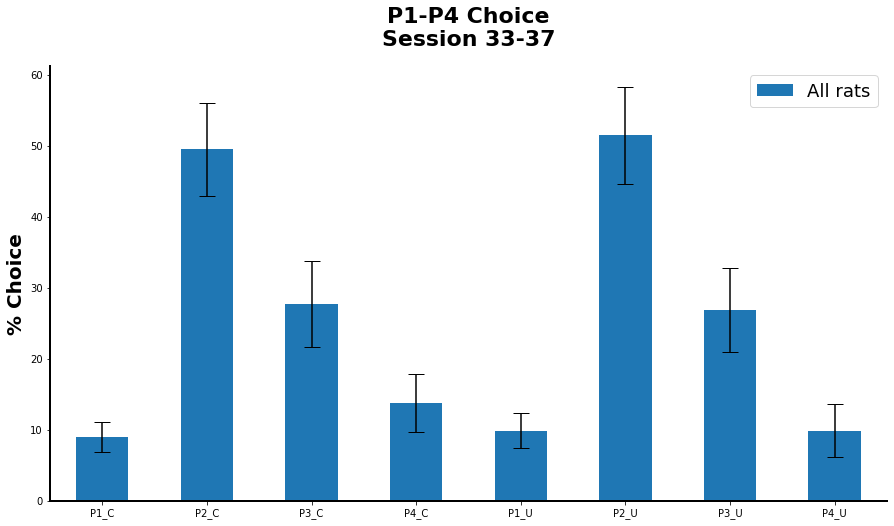

In [11]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM, task = 'choiceRGT')

#to save this figure (or any other figure):
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

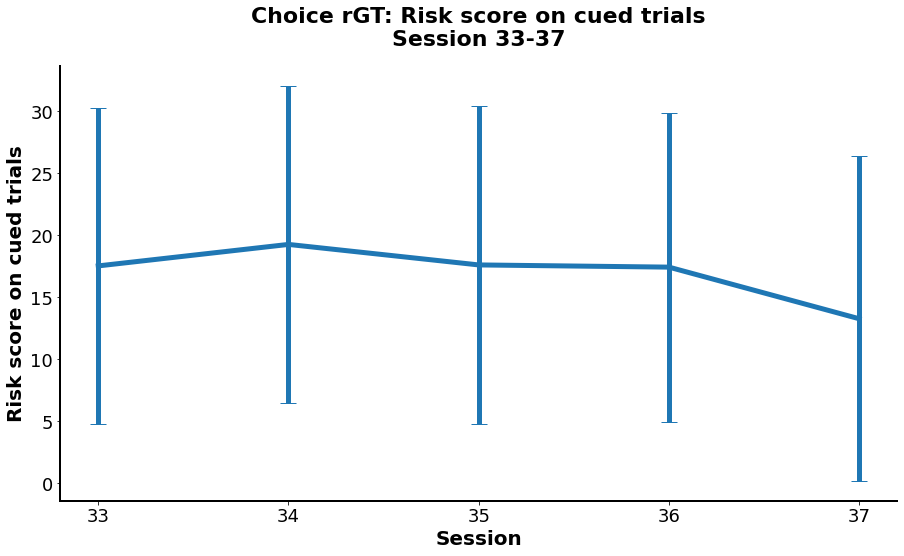

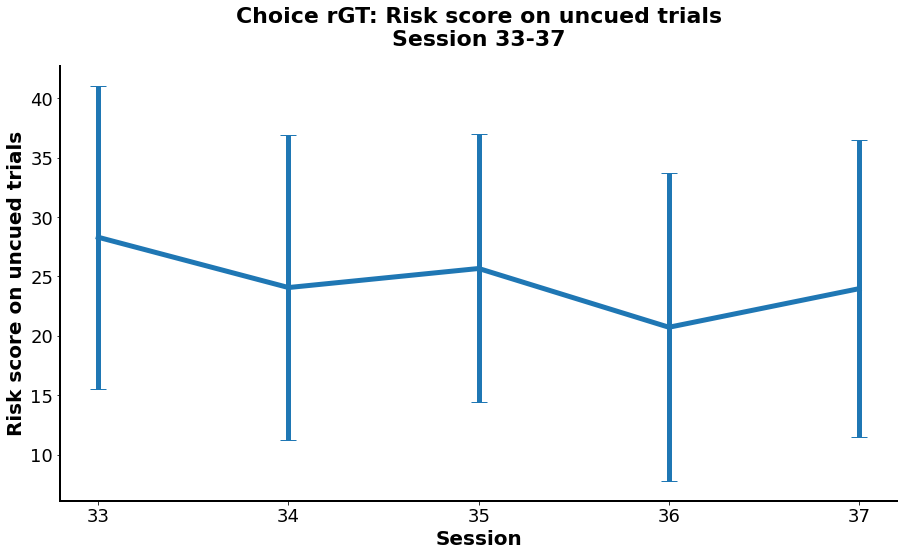

In [16]:
rgt.rgt_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on cued trials') 
rgt.rgt_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on uncued trials') 

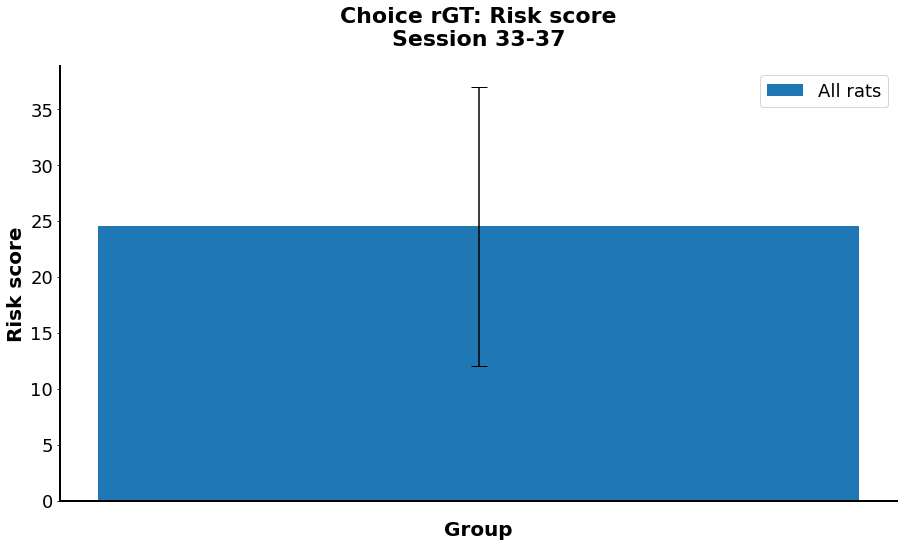

In [13]:
rgt.rgt_bar_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'

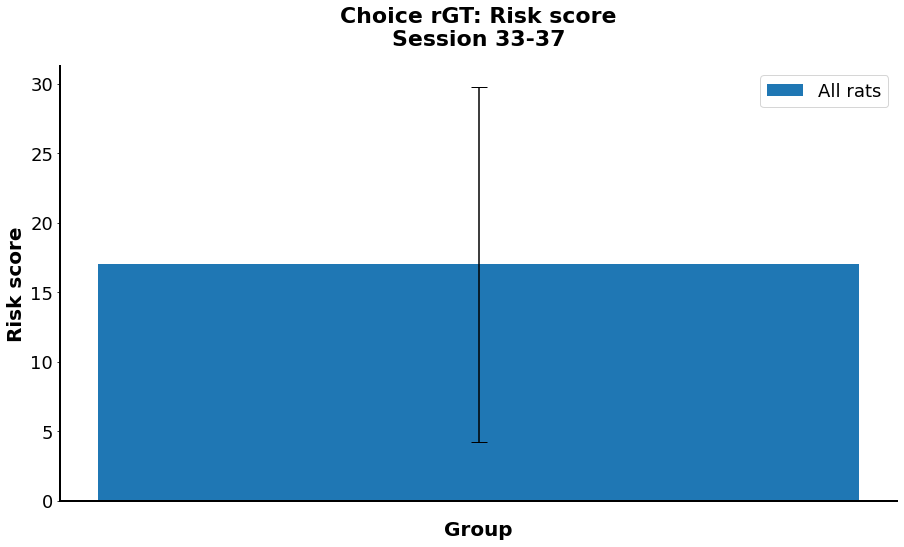

In [14]:
rgt.rgt_bar_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'